# シグモイド関数とステップ関数

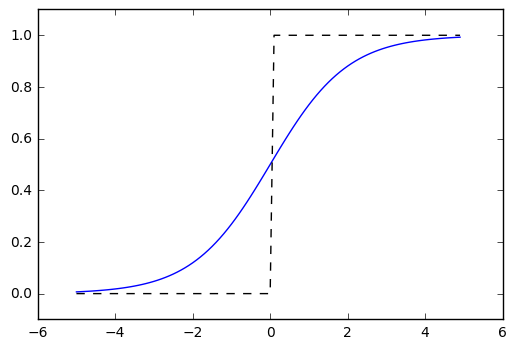

In [5]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)


plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #図で描画するy軸の範囲を指定
plt.show()


# neural networkの構築

## 用意された重みを用いて出力を行なってみる

In [6]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

ImportError: You should use Python 3.x